<a href="https://colab.research.google.com/github/SubasAd/3D-game-Engine-Graphics/blob/main/CharacterSegementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:

import tensorflow as tf
from tensorflow import keras
import numpy as np

import matplotlib.pyplot as plt
import cv2

import warnings
warnings.filterwarnings("ignore")
class Recog:
 
        def prediction(img):
            json_file = open('modelCNN (5).json', 'r')

            loaded_model_json = json_file.read()
            json_file.close()
            loaded_model = model_from_json(loaded_model_json)
            loaded_model.load_weights("modelCNN (6).h5")
            loaded_model.save('modelCnn.hdf5')
            loaded_model=load_model('modelCnn.hdf5')
            roi = cv2.resize(img, (32,32), interpolation=cv2.INTER_AREA)
            roi = np.array(roi)
            roi.reshape(1,1024)
            prediction = loaded_model.predict(roi.reshape(1,1024))
            characters = 'क,ख,ग,घ,ङ,च,छ,ज,झ,ञ,ट,ठ,ड,ढ,ण,त,थ,द,ध,न,प,फ,ब,भ,म,य,र,ल,व,श,ष,स,ह,क्ष,त्र,ज्ञ,०,१,२,३,४,५,६,७,८,९'
            characters = characters.split(',')

            output = characters[np.argmax(prediction.reshape(46))]
            return output
        def classifier(segments):
            pred_lbl = ""
            acc = []
            try:
             for segment in segments:
                segment = cv2.dilate(segment,np.ones((1, 1), np.uint8))
                segment = cv2.resize(segment, (32, 32))
                segment = cv2.erode(segment, (3, 3), 1)
                lbl = prediction(segment)
                pred_lbl+=lbl
                plt.imshow(segment)
                plt.show()
            except:
                pass
            return pred_lbl
        return classifier(segments[0])

x = Recog()
img  = cv2.imread("0.png")
x.Recognition(img)

SyntaxError: ignored

{0: 0, 1: 0, 2: 4, 3: 11, 4: 12, 5: 12, 6: 13, 7: 12, 8: 13, 9: 13, 10: 14, 11: 14, 12: 14, 13: 14, 14: 13, 15: 26, 16: 30, 17: 29, 18: 29, 19: 24, 20: 10, 21: 5, 22: 5, 23: 5, 24: 5, 25: 5, 26: 5, 27: 5, 28: 5, 29: 5, 30: 5, 31: 5, 32: 7, 33: 28, 34: 31, 35: 31, 36: 31, 37: 23, 38: 5, 39: 4, 40: 4, 41: 4, 42: 4, 43: 4, 44: 4, 45: 4, 46: 4, 47: 4, 48: 4, 49: 8, 50: 16, 51: 19, 52: 21, 53: 24, 54: 24, 55: 18, 56: 17, 57: 16, 58: 15, 59: 14, 60: 10, 61: 10, 62: 17, 63: 18, 64: 17, 65: 16, 66: 15, 67: 14, 68: 13, 69: 12, 70: 11, 71: 11, 72: 11, 73: 11, 74: 20, 75: 22, 76: 21, 77: 26, 78: 27, 79: 26, 80: 16, 81: 9, 82: 5, 83: 5, 84: 5, 85: 5, 86: 5, 87: 5, 88: 5, 89: 5, 90: 9, 91: 18, 92: 19, 93: 21, 94: 26, 95: 27, 96: 25, 97: 22, 98: 19, 99: 13, 100: 12, 101: 12, 102: 12, 103: 12, 104: 11, 105: 24, 106: 32, 107: 32, 108: 32, 109: 31, 110: 13, 111: 4, 112: 4, 113: 4, 114: 4, 115: 4, 116: 4, 117: 4, 118: 5, 119: 6, 120: 6, 121: 6, 122: 6, 123: 6, 124: 6, 125: 6, 126: 6, 127: 4, 128: 0, 129

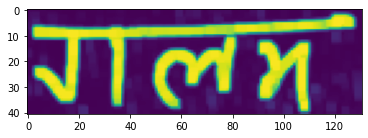

In [107]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image and convert to grayscale
ximg = cv2.imread('7.png')
img = cv2.bitwise_not(ximg)
img = cv2.dilate(img, np.ones((3, 3), np.uint8))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to black and white
_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
dict = {}
for i in range(0,len(img[0])):
  sum = 0
  for j in range(0, len(img)):
      if img[j][i] > 100:
        sum += 1
  dict[i] = sum   

x = dict.values()
x = list(set(x))



greater_than_threshold = {k: v for k, v in dict.items() if v > max(x[0:5])}

plt.imshow(img)


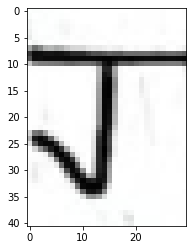

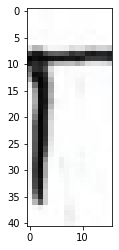

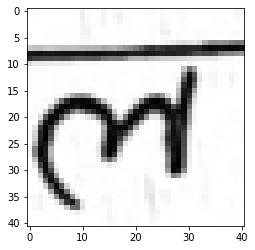

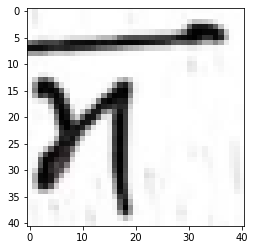

In [109]:

# Initialize the current key and the current part
current_key = min(greater_than_threshold.keys())
current_part = {current_key: greater_than_threshold[current_key]}
parts = [current_part]

keys  = [ ]
for key in sorted(greater_than_threshold.keys()):
    if key == current_key + 1:
        current_key = key
        current_part[key] = greater_than_threshold[key]
    # If the key is inconsecutive, start a new part
    else:
        current_key = key
        keys.append(key)
        current_part = {current_key: greater_than_threshold[key]}
        parts.append(current_part)
keys.append(ximg.shape[1])
segmentedimages = []
for key in range(0,len(keys)-1):
    imgx = ximg[0:ximg.shape[0],keys[key]:keys[key+1]]
    segmentedimages.append(imgx)
    plt.imshow(imgx)
    plt.show()
